# Insurance Dataset

 #age: age of primary beneficiary

 #sex: insurance contractor gender, female, male

 #bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
 objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

 #children: Number of children covered by health insurance / Number of dependents

 #smoker: Smoking

 #region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

 #charges: Individual medical costs billed by health insurance

In [1]:
#Import the dependencies

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

# Import the dataset

In [3]:
data=pd.read_csv("C:\\Users\\anujr\\OneDrive\\Documents\\data analyst\\ml raw data files\\insurance.csv")

In [4]:
# check the first five rows

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#check last five rows

In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
# check total rows and columns

In [12]:
data.shape # it consists 1338 rows and 7 columns

(1338, 7)

In [10]:
# check data type and some info about data

In [13]:
data.info() # this dataset contains 3 columnns having object/categorical datatype and rest of other contains numerical datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
 #Machine leanring model doesn't work on categorical data type , it works on numerical data type
 # so For machine learning model , we have to convert this model data from strigs to numerical
 # ---->

# Categorical Columns :
# Sex
# Smoker
# Region

In [16]:
# check for missing values

In [17]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [18]:
data.isnull().sum() # there is no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# check for duplicate value

In [20]:
data.duplicated().sum() # there is only one duplicate value

1

In [24]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [25]:
# Remove this duplicate value

In [26]:
data=data.drop_duplicates()

In [27]:
#check for duplicate value

In [28]:
data.duplicated().sum()

0

In [45]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
#there is no duplicate value

In [35]:
uniq_val=data[["sex",'children','smoker','region']]
uniq_val.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [44]:
for i,var in enumerate(uniq_val):
    print(uniq_val[var].value_counts(),i+1)

male      675
female    662
Name: sex, dtype: int64 1
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 2
no     1063
yes     274
Name: smoker, dtype: int64 3
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64 4


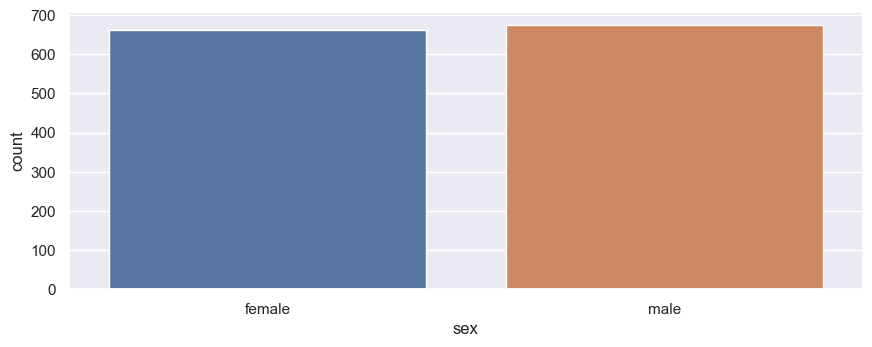

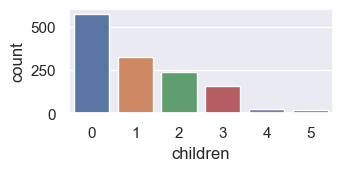

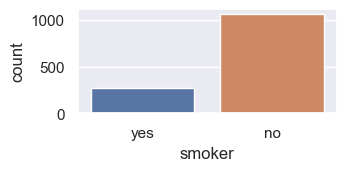

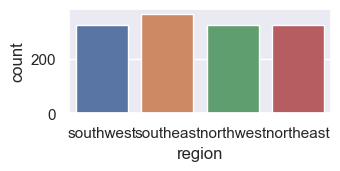

In [85]:
sns.set()
plt.figure(figsize=(17,10))
for i,var in enumerate(uniq_val.columns):
    plt.subplot(3,2,i+1)
    sns.countplot(x=uniq_val[var],data=uniq_val)
    plt.tight_layout()
    plt.show()

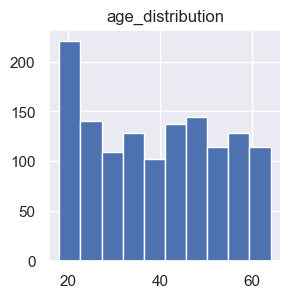

In [92]:
sns.set()
plt.figure(figsize=(3,3))
plt.hist(data['age'])
plt.title("age_distribution")
plt.show()



<Figure size 1200x500 with 0 Axes>

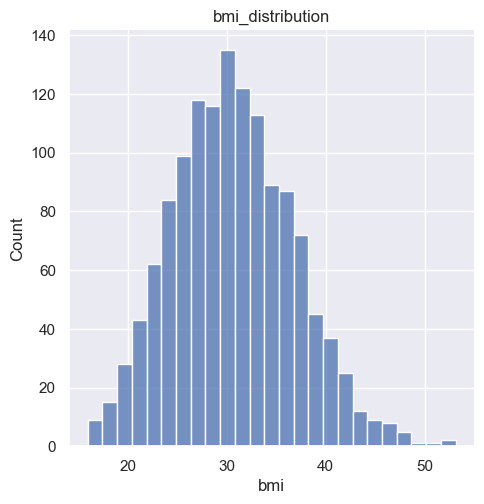

In [87]:
sns.set()
plt.figure(figsize=(12,5))
sns.displot(data['bmi'])
plt.title("bmi_distribution")
plt.show()

In [93]:
#data Pre-processing
#encoding the categorical data

In [95]:
#encode sex column
data.replace({"sex":{"male":"0","female":"1"}},inplace=True)

In [96]:
#encode smoker column
data.replace({"smoker":{"yes":"0","no":"1"}},inplace=True)

In [97]:
#encode region column
data.replace({"region":{"southeast":"0","southwest":"1","northeast":"2","northwest":3}},inplace=True)

In [98]:
#print first 5 rows to check data

In [99]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [100]:
#split the data and labels

In [101]:
X=data.drop(columns=["charges"],axis=1)

In [102]:
Y=data["charges"]

In [104]:
print(X.head(),Y.head())

   age sex     bmi  children smoker region
0   19   1  27.900         0      0      1
1   18   0  33.770         1      1      0
2   28   0  33.000         3      1      0
3   33   0  22.705         0      1      3
4   32   0  28.880         0      1      3 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [105]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [106]:
print(X.shape,x_train.shape,x_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [107]:
print(Y.shape,y_train.shape,y_test.shape)

(1337,) (1069,) (268,)


In [109]:
Lr=LinearRegression()

In [111]:
Lr.fit(x_train,y_train)

LinearRegression()

In [113]:
print("intercept :",Lr.intercept_)

intercept : 11117.865604878789


In [114]:
print("coffeicent:",Lr.coef_)

coffeicent: [   263.63631435    284.54712957    331.59576934    410.4488566
 -24172.93937725    271.75301159]


In [119]:
Lr.score(x_test,y_test) # it gives score which is 74 Percent

0.7452640102226973

In [120]:
rr=RandomForestRegressor()

In [121]:
rr.fit(x_train,y_train)

RandomForestRegressor()

In [122]:
rr.score(x_test,y_test) # RR model gives maximum accuracy than Linear regression model

0.830684929386116

In [123]:
training_data_pred=rr.predict(x_train)

In [127]:
print("training pred:",training_data_pred)


training pred: [ 8553.1522473  2247.550179   4555.8851477 ... 36656.2578582  2172.759403
 47044.0120823]


In [128]:
#r2_score
r2_score(y_train,training_data_pred) #r2_score represents the goodness of model

0.9766440190125794

In [129]:
#Predict a value

In [131]:
#31,female,25.74,0,no,southeast this is value to check prediction
#but we have to change categorical data into numerical  female=1,no=1,southeast=0
input_data=(31,1,25.74,0,1,0)
#changing input data in array
input_data_array=np.asarray(input_data)
#reshape it
input_data_reshape=input_data_array.reshape(1,-1)

# make prediction
prediction=rr.predict(input_data_reshape)

#print
print(prediction)

[3912.4395331]


C:\Users\anujr\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [143]:
#save the model
import pickle

In [144]:
filename="insurance_model.sav"

In [145]:
pickle.dump(rr,open(filename,"wb"))